In [33]:
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### 선형회귀

In [98]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LinearRegression()  # LinearRegression는 hyper parameter가 없음
model.fit(X_train,y_train)  # 학습

LinearRegression()

In [31]:
# 회귀계수 : 다항이면 coef가 여러개가 될 수 있기 때문에 array로 반환
model.coef_

array([0.44153666])

In [32]:
# y절편
model.intercept_

-0.01711124414733381

In [24]:
# 평가
# y_test 값과 X_test predict 값을 비교해서 차이가 얼마나 나는지 확인
prediction = model.predict(X_test)
prediction

array([-0.81274146,  0.79990117, -0.47984962,  0.22771528,  1.22778333,
        0.59749174,  1.21645044, -1.2219042 , -1.01841511, -0.5677658 ,
       -0.92839354, -1.28718838,  0.26779873, -0.02988867,  1.17208529])

In [25]:
[model.coef_*x+model.intercept_ for x in X_test]

[array([-0.81274146]),
 array([0.79990117]),
 array([-0.47984962]),
 array([0.22771528]),
 array([1.22778333]),
 array([0.59749174]),
 array([1.21645044]),
 array([-1.2219042]),
 array([-1.01841511]),
 array([-0.5677658]),
 array([-0.92839354]),
 array([-1.28718838]),
 array([0.26779873]),
 array([-0.02988867]),
 array([1.17208529])]

In [28]:
# R^2 : 높을수록 좋음
# 결정계수
# 1에 가까울 수록 좋은 회귀 모델
# 0에 가까울 수록 나쁜 모델
# 음수가 나올경우, 바로 폐기해야 하는 모델

model.score(X_test,y_test)

0.6932519118518163

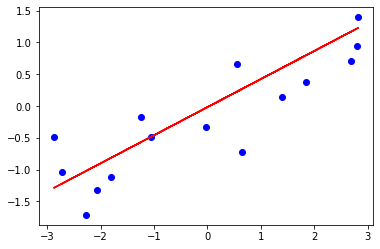

In [29]:
plt.plot(X_test, [model.coef_*x+model.intercept_ for x in X_test], c='r')
plt.scatter(X_test, y_test, c='b')

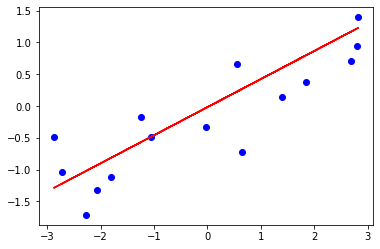

In [30]:
plt.plot(X_test, model.predict(X_test), c='r')
plt.scatter(X_test, y_test, c='b')

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Ridge(alpha=5)  
model.fit(X_train,y_train)  

Ridge(alpha=5)

In [37]:
model.coef_

array([0.43835808])

In [38]:
model.intercept_

-0.01784482961810112

In [40]:
prediction = model.predict(X_test)
prediction

array([-0.80774738,  0.79328599, -0.477252  ,  0.22521921,  1.21808786,
        0.59233369,  1.20683656, -1.21396459, -1.0119404 , -0.56453527,
       -0.92256689, -1.2787788 ,  0.2650141 , -0.03053027,  1.16279079])

In [133]:
model.score(X_test,y_test)

0.7033653283613296

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = Lasso(alpha=0.2)  
model.fit(X_train,y_train)  

Lasso(alpha=0.2)

In [112]:
prediction = model.predict(X_test)
prediction

array([-0.75122087,  0.71841075, -0.44785026,  0.19696696,  1.10834781,
        0.53395122,  1.09801994, -1.12409858, -0.93865513, -0.52796993,
       -0.85661678, -1.18359328,  0.23349576, -0.03779237,  1.05758915])

In [129]:
# 회귀모델 = R^2
model.score(X_test,y_test)

0.7188128689459532

### 로지스틱회귀


In [138]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [145]:
cancer = load_breast_cancer()

In [ ]:
feature_names = pd.DataFrame(cancer["feature_names"])
feature_names.value_counts

In [161]:
# data : 독립변수
# target : 종속변수
# feature_names
X = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
y = pd.DataFrame(cancer["target"], columns=["target"])
display(X)
display(y)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = LogisticRegression(C=0.1, max_iter=5000)
model.fit(X_train, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.1, max_iter=5000)

In [167]:
model.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

In [168]:
# 분류 모델 = 정답률
model.score(X_test,y_test)

0.9440559440559441

In [170]:
# 예측값과 실측값 비교해서 score에 점수 주는 방법
pred = list(model.predict(X_test))
label = list(y_test["target"])
print(pred, "\n", label)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0] 
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]


In [182]:
len(pred), len(label)

(143, 143)

In [185]:
score = 0
# range(len) -> pred에 가서 찾아야하는 시간도 걸림
for i in range(len(pred)):
    if(pred[i]==label[i]):
        score += 1
    else:
        pass
score/len(pred)

0.9440559440559441

In [186]:
score = 0
# a = index 번호, i = pred[a] 값
for a,i in enumerate(pred):
    if label[a]==i:
        score += 1
    else:
        pass
score/len(pred)

0.9440559440559441

In [187]:
model.score(X_test,y_test)

0.9440559440559441